In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config ZMQInteractiveShell.ast_node_interactivity='all'
%pprint

Pretty printing has been turned ON


In [9]:
# 大小设置
sns.set(rc={'figure.figsize':(13,7)})
# 风格设置
sns.set_style("whitegrid")

goal = 'target'

- 目的：将不错的模型进行加权融合。
- 思路：RF、GBDT、XGBoost常见面试题整理https://zhuanlan.zhihu.com/p/34679467
- 强化版：
       GBDT对异常值敏感，RF对异常值不敏感；
       随机森林是通过减少模型的方差来提高性能，而GBDT是减少模型的偏差来提高性能；
       随机森林不需要进行数据预处理，即特征归一化。而GBDT则需要进行特征归一化。


# 加载预测数据

- sample_submit04-1328-xgb-delOutlies.txt：去异常且调过参之后的xgb结果。
- sample_submit05-1399-lgb-delOutlies.txt：去异常且调过参之后的lgb结果。
- sample_submit07-1284-rf.txt：未去异常、调过参之后的RF结果

In [2]:
submission4 = pd.read_table('../result/sample_submit04-1328-xgb-delOutlies.txt', sep='\t', header=None, names=None, index_col=None)
submission4.columns = [goal]
submission5 = pd.read_table('../result/sample_submit05-1399-lgb-delOutlies.txt', sep='\t', header=None, names=None, index_col=None)
submission5.columns = [goal]
submission7 = pd.read_table('../result/sample_submit07-1284-rf.txt', sep='\t', header=None, names=None, index_col=None)
submission7.columns = [goal]


In [4]:
xgb_lgb_rf_data = pd.DataFrame({"submission4": submission4.target, 
                                "submission5":submission5.target, 
                                "submission7":submission7.target})

In [5]:
xgb_lgb_rf_data.head()

,submission4,submission5,submission7
0,0.425871,0.494140,0.311136
1,0.224224,0.377177,0.199580
2,0.048237,0.148564,-0.027754
3,0.177480,0.380818,0.111690
4,0.344722,0.457303,0.300254


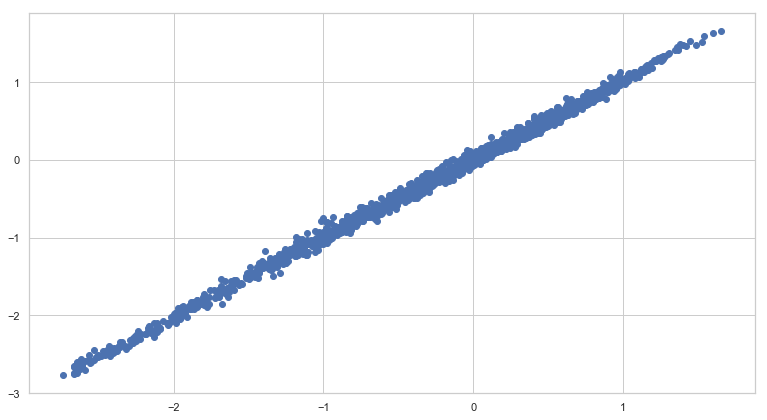

In [15]:
merge_res = 2/3*xgb_lgb_rf_data.submission7 + 1/9*xgb_lgb_rf_data.submission4 + 2/9*xgb_lgb_rf_data.submission5
plt.scatter(xgb_lgb_rf_data.submission7, merge_res)

In [16]:
submission = pd.DataFrame({goal: merge_res})
submission.to_csv("../result/sample_submit08-xxxx-1_9subm4-2_9subm5-6_9subm7.txt", sep='\t', index=False, header=False)